This is an implementation of Content Based Recommendation system on Netflix Movie Dataset

## Import Libraries

In [90]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud

## Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
df_netflix = pd.read_csv("drive/My Drive/datasets/netflix_titles.csv")
print (df_netflix.shape)
df_netflix.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Graphical Analysis

[]

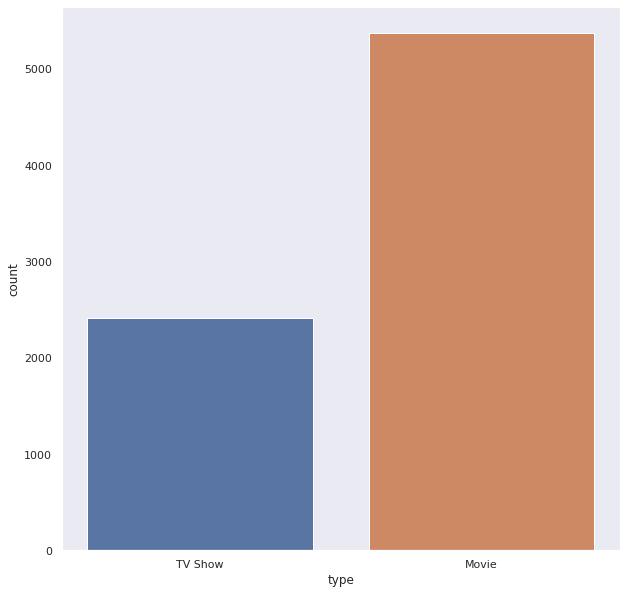

In [57]:
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.countplot(x ='type', data = df_netflix)
plt.plot()

In [73]:
#for countries in df_netflix["country"]:
print("Any null values in country column : ",df_netflix["country"].isnull().values.any())

list_country = list()
for countries in df_netflix["country"].dropna():
  for country in countries.split(", "):
    list_country.append(country)

from collections import Counter
df_netflix_country_count = pd.DataFrame(Counter(list_country).most_common()[:10], columns=['Country', 'Count'])

Any null values in country column :  True


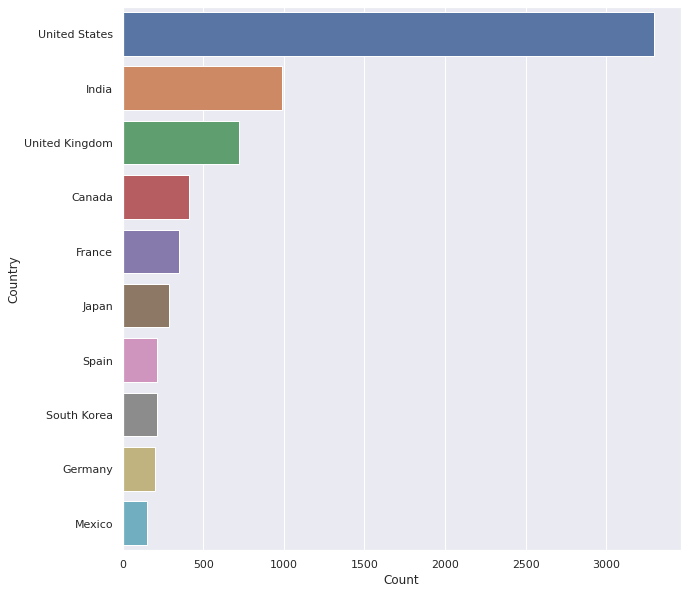

In [74]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="Country", x='Count', data=df_netflix_country_count)

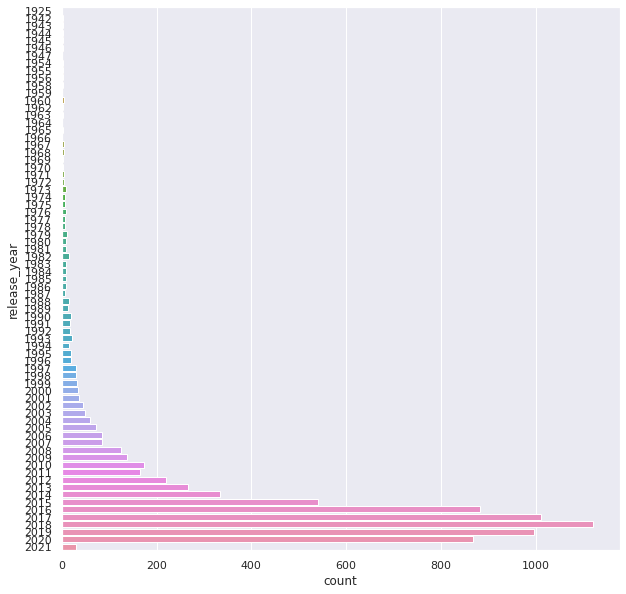

In [75]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=df_netflix)

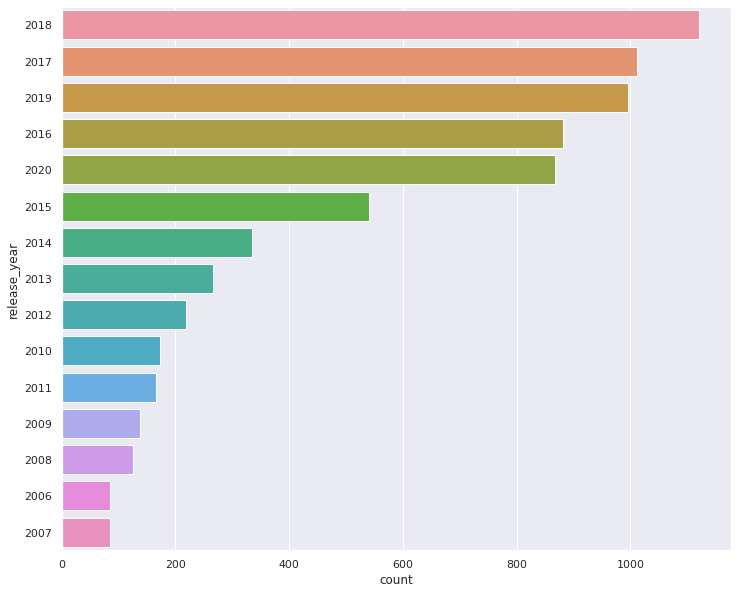

In [61]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=df_netflix, order=df_netflix['release_year'].value_counts().index[0:15])

## Data preprocessing

In [76]:
df_netflix.drop(columns=['director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'type'], inplace=True)
df_netflix.head()

,show_id,title,listed_in,description
0,s1,3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,Dramas,A brilliant group of students become card-coun...


In [78]:
# https://stackoverflow.com/questions/42750551/converting-strings-to-a-lower-case-in-pandas
df_netflix['title_list'] = df_netflix['title'].str.lower()
df_netflix.listed_in = df_netflix.listed_in.astype(str).str.lower()
df_netflix.description = df_netflix.description.astype(str).str.lower()

In [80]:
nltk.download('punkt')
df_netflix['title_list'] = df_netflix['title_list'].apply(word_tokenize)
df_netflix['listed_in'] = df_netflix['listed_in'].apply(word_tokenize)
df_netflix['description'] = df_netflix['description'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
df_netflix

,show_id,title,listed_in,description,title_list
0,s1,3%,"[international, tv, shows, ,, tv, dramas, ,, t...","[in, a, future, where, the, elite, inhabit, an...","[3, %]"
1,s2,7:19,"[dramas, ,, international, movies]","[after, a, devastating, earthquake, hits, mexi...",[7:19]
2,s3,23:59,"[horror, movies, ,, international, movies]","[when, an, army, recruit, is, found, dead, ,, ...",[23:59]
3,s4,9,"[action, &, adventure, ,, independent, movies,...","[in, a, postapocalyptic, world, ,, rag-doll, r...",[9]
4,s5,21,[dramas],"[a, brilliant, group, of, students, become, ca...",[21]
...,...,...,...,...,...
7782,s7783,Zozo,"[dramas, ,, international, movies]","[when, lebanon, 's, civil, war, deprives, zozo...",[zozo]
7783,s7784,Zubaan,"[dramas, ,, international, movies, ,, music, &...","[a, scrappy, but, poor, boy, worms, his, way, ...",[zubaan]
7784,s7785,Zulu Man in Japan,"[documentaries, ,, international, movies, ,, m...","[in, this, documentary, ,, south, african, rap...","[zulu, man, in, japan]"
7785,s7786,Zumbo's Just Desserts,"[international, tv, shows, ,, reality, tv]","[dessert, wizard, adriano, zumbo, looks, for, ...","[zumbo, 's, just, desserts]"


In [84]:
# https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
nltk.download('stopwords')
list_stopwords = set(stopwords.words('english') + list(punctuation))
df_netflix['title_list'] = df_netflix['title_list'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_netflix['listed_in'] = df_netflix['listed_in'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_netflix['description'] = df_netflix['description'].apply(lambda x: [word for word in x if word not in list_stopwords])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [87]:
df_netflix['description'] = df_netflix['description'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_netflix['description'] = df_netflix['description'].apply(lambda x : [word for word in x if len(word) > 0])

In [88]:
df_netflix['title_list'] = df_netflix['title_list'].apply(lambda x : list(set(x)))
df_netflix['listed_in'] = df_netflix['listed_in'].apply(lambda x : list(set(x)))
df_netflix['description'] = df_netflix['description'].apply(lambda x : list(set(x)))

In [89]:
df_netflix

,show_id,title,listed_in,description,title_list
0,s1,3%,"[fantasy, dramas, international, tv, shows, sc...","[one, future, far, get, join, crowded, inhabit...",[3]
1,s2,7:19,"[international, movies, dramas]","[wait, desperately, devastating, trapped, mexi...",[7:19]
2,s3,23:59,"[international, movies, horror]","[s, terrifying, found, secret, camp, fellow, s...",[23:59]
3,s4,9,"[independent, movies, fantasy, adventure, sci-...","[postapocalyptic, ragdoll, machines, hide, new...",[9]
4,s5,21,[dramas],"[experts, las, students, brilliant, swindling,...",[21]
...,...,...,...,...,...
7782,s7783,Zozo,"[international, movies, dramas]","[s, zozo, civil, grandparents, escapes, sweden...",[zozo]
7783,s7784,Zubaan,"[movies, dramas, international, music, musicals]","[s, scrappy, worms, poor, dysfunctional, past,...",[zubaan]
7784,s7785,Zulu Man in Japan,"[movies, international, music, documentaries, ...","[tokyo, documentary, s, sights, stage, south, ...","[japan, man, zulu]"
7785,s7786,Zumbo's Just Desserts,"[international, shows, tv, reality]","[adriano, prize, skilled, next, competing, “, ...","[desserts, 's, zumbo]"


## Wordcloud visualization

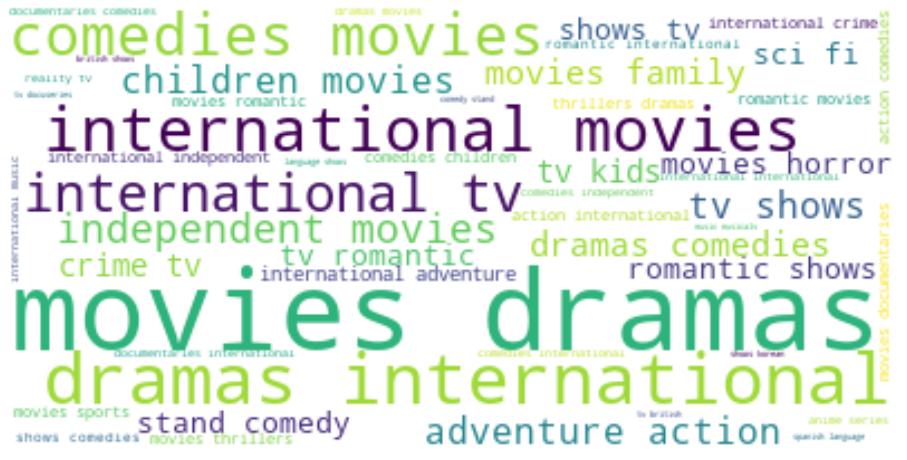

In [96]:
list_genre = list()
for genres in df_netflix['listed_in']:
  for genre in genres:
    list_genre.append(genre)
genre = ' '.join(list_genre)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(genre)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

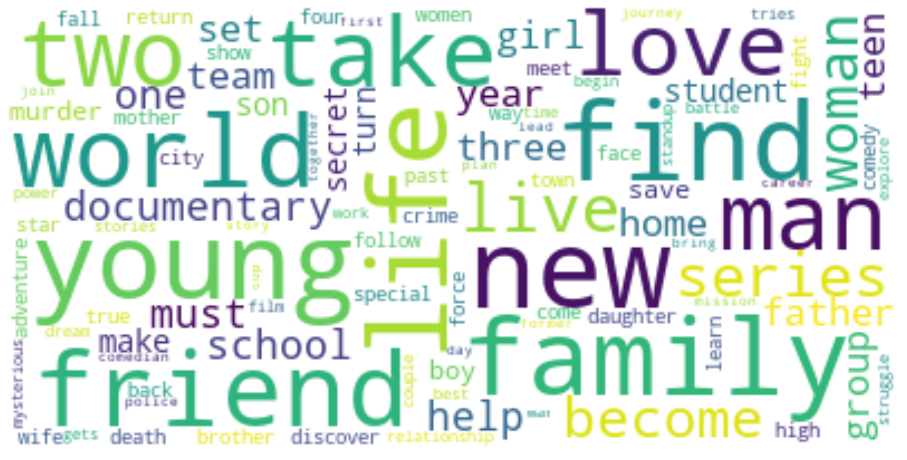

In [97]:
list_description = list()
for descriptions in df_netflix['description']:
  for description	in descriptions:
    list_description.append(description)
description	= ' '.join(list_description)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(description)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Gensim is an open source Python library for natural language processing, with a focus on topic modeling.
Word2vec is one algorithm for learning a word embedding from a text corpus.

## Pretrained Google's Word2Vec Model

In [99]:
import gensim
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-02-13 21:13:07--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.68.14
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.68.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  88.7MB/s    in 18s     

2021-02-13 21:13:26 (85.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [100]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [101]:
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [115]:
len(model.vocab)

3000000

In [104]:
matrix_netflix_vocab = []
for list_ in df_netflix.to_numpy():
    list_[2] = [word for word in list_[2] if word in model.vocab]
    list_[3] = [word for word in list_[3] if word in model.vocab]
    list_[4] = [word for word in list_[4] if word in model.vocab]
    matrix_netflix_vocab.append(list_)
df_netflix_vocab = pd.DataFrame(matrix_netflix_vocab, columns=df_netflix.columns)

In [110]:
df_netflix_vocab

,show_id,title,listed_in,description,title_list
0,s1,3%,"[fantasy, dramas, international, tv, shows]","[one, future, far, get, join, crowded, inhabit...",[3]
1,s2,7:19,"[international, movies, dramas]","[wait, desperately, devastating, trapped, mexi...",[]
2,s3,23:59,"[international, movies, horror]","[s, terrifying, found, secret, camp, fellow, s...",[]
3,s4,9,"[independent, movies, fantasy, adventure, action]","[postapocalyptic, ragdoll, machines, hide, new...",[9]
4,s5,21,[dramas],"[experts, las, students, brilliant, swindling,...",[]
...,...,...,...,...,...
7782,s7783,Zozo,"[international, movies, dramas]","[s, civil, grandparents, escapes, sweden, litt...",[]
7783,s7784,Zubaan,"[movies, dramas, international, music, musicals]","[s, scrappy, worms, poor, dysfunctional, past,...",[]
7784,s7785,Zulu Man in Japan,"[movies, international, music, documentaries, ...","[tokyo, documentary, s, sights, stage, south, ...","[japan, man, zulu]"
7785,s7786,Zumbo's Just Desserts,"[international, shows, tv, reality]","[adriano, prize, skilled, next, competing, wiz...",[desserts]


## Recommedation based on title,genre and description

In [145]:
from tqdm import tqdm

def recommendation(title):
    matrix_netflix_title_vocab = []
    for list_ in df_netflix[df_netflix['title'] == title].to_numpy():
        list_[2] = [word for word in list_[2] if word in model.vocab]
        list_[3] = [word for word in list_[3] if word in model.vocab]
        list_[4] = [word for word in list_[4] if word in model.vocab]
        matrix_netflix_title_vocab.append(list_)

    matrix_similarity = []
    pbar = tqdm(matrix_netflix_vocab)

    for list1 in pbar:
        for list2 in matrix_netflix_title_vocab:
            score_catg = model.n_similarity(list1[2], list2[2])
            score_desc = model.n_similarity(list1[3], list2[3])
            try:
                score_title = model.n_similarity(list1[4], list2[4])/2
            except:
                score_title = 0
            if ((list1[1] != list2[1]) & (score_catg > 0.85)):
                matrix_similarity.append([list1[1], list2[1], score_title, score_catg, score_desc])
        pbar.update()
    pbar.close()
    df_netflix_similarity = pd.DataFrame(matrix_similarity, columns = ['recommendation','title','score_title', 'score_category', 'score_description'])
    df_netflix_similarity['final_score'] = df_netflix_similarity['score_title'] + df_netflix_similarity['score_category'] + df_netflix_similarity['score_description']
    return (df_netflix_similarity.sort_values(by=['final_score', 'score_category', 'score_description', 'score_title'], ascending=False).head(10))

In [144]:
# Practice
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.n_similarity.html
print(model.n_similarity(['cat','dog'],['dog']))
print(model.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant']))
print(model.n_similarity(['restaurant', 'japanese'], ['japanese', 'restaurant']))

0.9371329
0.5983723
1.0


## Sample recommedations

In [146]:
recommendation('Avengers: Infinity War')

100%|██████████| 7787/7787 [00:02<00:00, 3557.76it/s]


,recommendation,title,score_title,score_category,score_description,final_score
123,Planet Hulk,Avengers: Infinity War,0.170187,1.000000,0.691321,1.861508
45,Doom: Annihilation,Avengers: Infinity War,0.210455,0.883960,0.699530,1.793944
162,Terminator Salvation,Avengers: Infinity War,0.214154,1.000000,0.555739,1.769893
114,Occupation,Avengers: Infinity War,0.172816,1.000000,0.583606,1.756422
116,Oh No! It's an Alien Invasion,Avengers: Infinity War,0.283219,0.860369,0.605135,1.748722
74,Hulk Vs.,Avengers: Infinity War,0.118704,1.000000,0.628452,1.747156
166,The Book of Eli,Avengers: Infinity War,0.131509,1.000000,0.614370,1.745879
161,Terminator 3: Rise of the Machines,Avengers: Infinity War,0.184206,1.000000,0.559653,1.743859
12,Alien Warfare,Avengers: Infinity War,0.265108,1.000000,0.458889,1.723997
138,Scorpion King 5: Book of Souls,Avengers: Infinity War,0.197633,1.000000,0.516952,1.714585


In [151]:
recommendation('Transformers: Robots in Disguise')

100%|██████████| 7787/7787 [00:02<00:00, 3425.43it/s]


,recommendation,title,score_title,score_category,score_description,final_score
181,Transformers Prime,Transformers: Robots in Disguise,0.259793,1.0,0.743294,2.003088
128,Power Rangers Ninja Steel,Transformers: Robots in Disguise,0.224441,1.0,0.715814,1.940255
184,Transformers: Rescue Bots,Transformers: Robots in Disguise,0.360727,1.0,0.577564,1.938291
183,Transformers: Cyberverse,Transformers: Robots in Disguise,0.329207,1.0,0.546093,1.875300
132,Power Rangers S.P.D.,Transformers: Robots in Disguise,0.129383,1.0,0.740242,1.869625
182,Transformers Rescue Bots Academy,Transformers: Robots in Disguise,0.339783,1.0,0.524451,1.864235
127,Power Rangers Mystic Force,Transformers: Robots in Disguise,0.140440,1.0,0.718094,1.858533
140,Power Rangers: Megaforce,Transformers: Robots in Disguise,0.129383,1.0,0.727662,1.857044
125,Power Rangers Lightspeed Rescue,Transformers: Robots in Disguise,0.191788,1.0,0.643679,1.835467
120,Power Rangers Dino Charge,Transformers: Robots in Disguise,0.151468,1.0,0.669428,1.820896


In [147]:
recommendation('Friends')

100%|██████████| 7787/7787 [00:02<00:00, 3608.08it/s]


,recommendation,title,score_title,score_category,score_description,final_score
29,Girlfriends,Friends,0.306857,0.853450,0.651396,1.811704
86,Toast of London,Friends,0.112076,0.924088,0.686581,1.722745
21,Episodes,Friends,0.040227,1.000000,0.644352,1.684579
18,Dad's Army,Friends,0.177361,0.924088,0.576079,1.677529
10,Big Mouth,Friends,0.085473,0.853450,0.722250,1.661173
61,Real Rob,Friends,0.090192,0.853450,0.693652,1.637294
38,I'm Sorry,Friends,0.123332,0.853450,0.657182,1.633965
23,F is for Family,Friends,0.199680,0.853450,0.572685,1.625816
74,The Andy Griffith Show,Friends,0.031710,1.000000,0.590680,1.622389
26,Frasier,Friends,0.000000,1.000000,0.619905,1.619905


In [148]:
recommendation("Article 15")

100%|██████████| 7787/7787 [00:02<00:00, 3278.35it/s]


,recommendation,title,score_title,score_category,score_description,final_score
1133,Parmanu: The Story of Pokhran,Article 15,0.259827,0.938539,0.534093,1.732458
792,Kalushi: The Story of Solomon Mahlangu,Article 15,0.232823,0.938539,0.555827,1.727189
1335,Sicilian Ghost Story,Article 15,0.189079,1.000000,0.527167,1.716246
728,Interrogation,Article 15,0.025696,1.000000,0.678837,1.704533
1020,My Birthday Song,Article 15,0.097087,1.000000,0.592792,1.689879
1545,The Hater,Article 15,0.105814,1.000000,0.577358,1.683172
1582,The Letter Reader,Article 15,0.275293,0.938539,0.447380,1.661212
968,Metro,Article 15,0.055806,1.000000,0.599458,1.655264
770,Just Another Love Story,Article 15,0.170546,0.938539,0.536949,1.646035
79,Aapla Manus,Article 15,0.079929,1.000000,0.565273,1.645202
